# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.


**Our goal is to build a model to predict the purchase amount of customer against various products which will help the company to create personalized offer for customers against different products**

We got our data from Black Friday Data Hack by Analytics Vidhya (https://datahack.analyticsvidhya.com/contest/black-friday-data-hack/)

Most of the features in the dataset are masked for privacy issues.

# 1 . Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd ..

/Users/Faliha/Dropbox/Faliha Zikra MIS @ SCU/Machine learning/MachineLearning


plots 

1. Difference in male female spending pattern - expensive products , high spenders, age
2. Difference in city spending pattern
3. Understanding High spenders vs low spenders - m/f, city , marital status , age comparison , occupation, stay in current city
4. Interaction within product categories



Features to engineer:
1. Amount each user spent
2. Num of products each user bought
3. Price variation of each product
4. Quantities of each product sold
5. Popular item 
6. High spender
7. No of times users pays higher price for product than average price
8. Avg price woman pay/ Men Pay
9. User category





In [3]:
df= pd.read_csv('data/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

### 1.1 Number of customers

In [6]:
# num of unique customers
df.User_ID.nunique()  

5891

### 1.2 Number of Products

In [7]:
#num of unique products
df.Product_ID.nunique()  #num of products

3631

### 1.3 Female / Male customers

In [8]:
df.Gender.value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

Most of the cutomers around 75 percent of them are men . This tells us that the store probably sells items that mostly cater to men . 

### 1.4 Occupation of the customers

In [9]:
df.Occupation.value_counts(normalize=True)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [ ]:
df.Occupation.plot(kind='pie')

ValueError: 'explode' must be of length 'x'

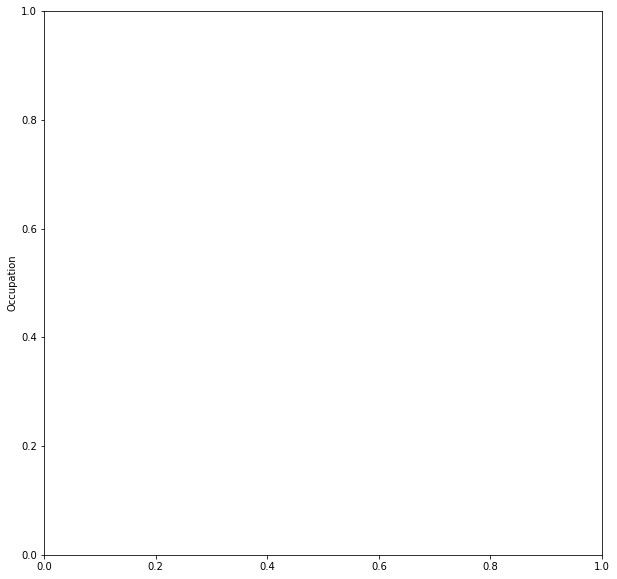

In [15]:

#plot to show different types of benzo orders placed 
explode = (0,0,0,0,0,0,0.1,0.1,0.1, 0.1, 0.2, 0.2, 0.3,  0.1, 0.2, 0.2, 0.3,  0.1, 0.2, 0.2, 0.1)
df.Occupation.plot(kind='pie', fontsize=15, colormap='plasma', explode=explode, figsize=(10,10),
       autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt.axis('equal')
plt.suptitle('Percentage of Orders placed for types of Benzodiazepine', fontsize=20)
plt.ylabel('Benzo types', fontsize=13)
plt.legend(labels=df.Occupation.index, loc="upper right")
plt.show()

Since this category is masked we don't exactly know what occupations the customers do. But this distribution 

### 1.5. City Category 

In [ ]:
df.Ci.value_counts(normalize=True)

### 1.6 Stay in City years

In [ ]:
df.Occupation.value_counts(normalize=True)

### 1.7 Marital Status of customers

In [ ]:
df.Occupation.value_counts(normalize=True)

In [121]:
# min mean and max of each purchase
df.Mean_Purchase_price.describe()

count    550068.000000
mean       9263.968713
std        4267.891837
min          36.675159
25%        6372.163743
50%        7785.074766
75%       12972.273148
max       21256.505495
Name: Mean_Purchase_price, dtype: float64

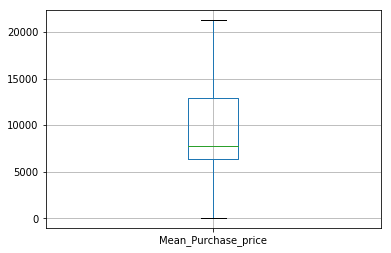

In [114]:
#purchase distribution
df.boxplot(column=['Mean_Purchase_price'])  # outliers , some products are more expensive than 23961

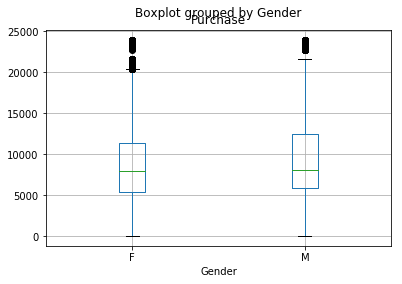

In [10]:
#purchase comparison between genders
df.boxplot(column=['Purchase'], by='Gender')  # men buy more expensive items 

In [11]:
df[df['Purchase']>21000]['Gender'].value_counts(normalize=True)  # more number of buy expensive items

M    0.787631
F    0.212369
Name: Gender, dtype: float64

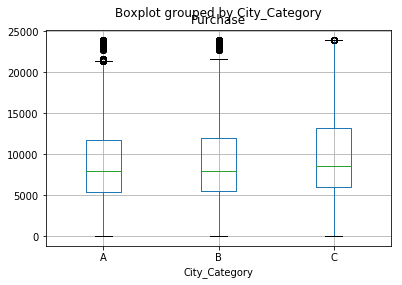

In [12]:
#purchase comparison between cities
df.boxplot(column=['Purchase'], by='City_Category')  # people in city B buy more expenisve items

In [13]:
df[df['Purchase']>12000]['City_Category'].value_counts(normalize=True)

B    0.408798
C    0.349632
A    0.241570
Name: City_Category, dtype: float64

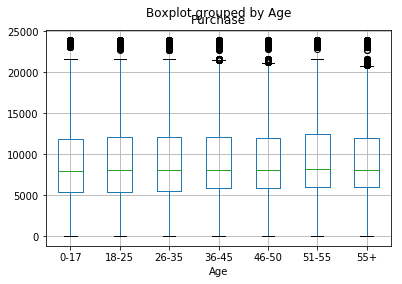

In [14]:
#purchase comparison by age
df.boxplot(column=['Purchase'], by='Age')  #need

In [15]:
df[df['Purchase']>12000]['Age'].value_counts(normalize=True)  # 26-35 is the mosre spending age  and younger and older people spend lesser as expected 

26-35    0.398366
36-45    0.204477
18-25    0.179324
46-50    0.081230
51-55    0.073311
55+      0.037449
0-17     0.025843
Name: Age, dtype: float64

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,4))
g=sns.catplot(x="Age", y="Purchase_price_x",kind="box", data=df, hue='Gender', height= 7, palette='husl', order=df.Age.values)

plt.title('Purchase pattern of customer by gender and age',fontsize=18)

plt.xlabel('Age of the customer', fontsize=14)
plt.ylabel('Purchase amount', fontsize=14);

KeyboardInterrupt: 

<Figure size 216x288 with 0 Axes>

/Users/Faliha/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Cost of the item')

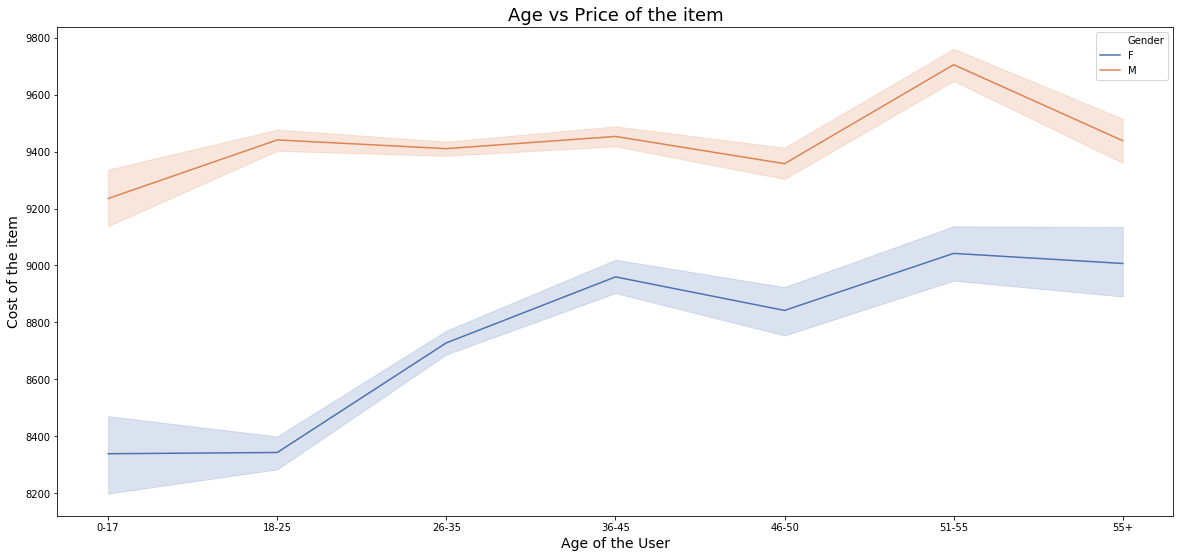

In [98]:

#plot to see how age affects the spending of the user
plt.subplots(figsize=(20,9))
sns.lineplot(x='Age',y='Purchase_price_x',hue='Gender', data=df, palette='deep')

plt.title('Age vs Price of the item', fontsize=18)
plt.xlabel('Age of the User', fontsize=14)
plt.ylabel('Cost of the item', fontsize=14)

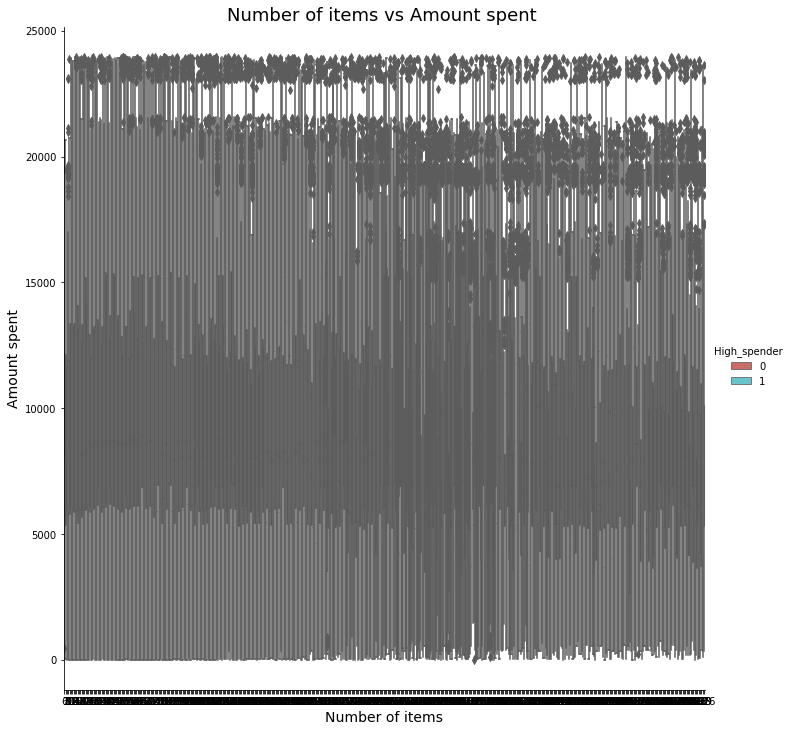

In [101]:
g=sns.catplot(x="User_prod_bought", y="Purchase_price_x",hue='High_spender',kind="box", data=df, height= 10, palette='hls')
plt.title('Number of items vs Amount spent ', fontsize=18)
plt.xlabel('Number of items', fontsize=14)
plt.ylabel('Amount spent', fontsize=14);

## Feature engg

In [18]:
numprod=pd.DataFrame(data=num).reset_index()

In [19]:
numprod.shape  # num of customers

(5891, 2)

In [20]:
df=pd.merge(df,numprod, on='User_ID')

In [21]:
df=df.rename( columns={"Product_ID_y": "User_prod_bought"})

In [22]:
df.head()

,User_ID,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_prod_bought
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,35
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,35
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,35
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,35
4,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842,35


In [23]:
# to show each product has a different price
df[df['Product_ID_x']=='P00000142']  

,User_ID,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_prod_bought
11,1000001,P00000142,F,0-17,10,A,2,0,3,4.0,5.0,13650,35
277,1000006,P00000142,F,51-55,9,A,1,0,3,4.0,5.0,10620,47
1135,1000018,P00000142,F,18-25,3,B,3,0,3,4.0,5.0,10854,180
1420,1000021,P00000142,M,18-25,16,B,0,0,3,4.0,5.0,8143,14
1653,1000023,P00000142,M,36-45,0,B,3,1,3,4.0,5.0,11017,171
2183,1000028,P00000142,F,26-35,1,C,2,1,3,4.0,5.0,8059,57
2680,1000034,P00000142,F,18-25,0,A,0,0,3,4.0,5.0,13521,100
2957,1000036,P00000142,M,26-35,3,B,0,0,3,4.0,5.0,13321,200
3835,1000048,P00000142,M,26-35,4,B,3,1,3,4.0,5.0,11076,338
3884,1000049,P00000142,M,18-25,12,C,4+,1,3,4.0,5.0,13353,60


In [24]:
# creating features with min mean and max of the price of prodcuts customers paid
mean=df.groupby('Product_ID_x')['Purchase'].mean()

In [25]:
mean=pd.DataFrame(data=mean).reset_index()

In [26]:
minp=df.groupby('Product_ID_x')['Purchase'].min()

In [27]:
minp=pd.DataFrame(data=minp).reset_index()

In [28]:
maxp=df.groupby('Product_ID_x')['Purchase'].max()
maxp=pd.DataFrame(data=maxp).reset_index()

In [29]:
df=pd.merge(df,mean, on='Product_ID_x')


In [30]:
df=df.rename( columns={"Purchase_x": "Purchase_price","Purchase_y": "Mean_Purchase_price"})

In [31]:
df=pd.merge(df,minp, on='Product_ID_x')

In [32]:
df=df.rename( columns={"Purchase": "Min_purchase_price"})

In [33]:
df=pd.merge(df,maxp, on='Product_ID_x')

In [34]:
df=df.rename( columns={"Product_ID_y": "Num_products_bought","Purchase": "Max_purchase_price"})

In [35]:
df.head() # new df with min mean and max price of each product

,User_ID,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_price,User_prod_bought,Mean_Purchase_price,Min_purchase_price,Max_purchase_price
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,35,11870.863436,2648,13716
1,1000017,P00069042,M,51-55,1,C,0,0,3,NaN,NaN,13591,115,11870.863436,2648,13716
2,1000023,P00069042,M,36-45,0,B,3,1,3,NaN,NaN,11022,171,11870.863436,2648,13716
3,1000030,P00069042,F,36-45,7,C,3,0,3,NaN,NaN,8036,31,11870.863436,2648,13716
4,1000073,P00069042,M,18-25,4,A,4+,0,3,NaN,NaN,10885,134,11870.863436,2648,13716


In [36]:
#number of products of each type that were sold in total
prdtcnt=df.groupby('Product_ID_x')['User_ID'].count()

In [37]:
prdtcnt=pd.DataFrame(data=prdtcnt).reset_index()

In [38]:
df=pd.merge(df,prdtcnt, on ='Product_ID_x') #num of times product was purchased

In [39]:
df=df.rename( columns={"User_ID_y": "Quantity_sold"})

In [40]:
df.head()

,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_price,User_prod_bought,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Quantity_sold
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,35,11870.863436,2648,13716,227
1,1000017,P00069042,M,51-55,1,C,0,0,3,NaN,NaN,13591,115,11870.863436,2648,13716,227
2,1000023,P00069042,M,36-45,0,B,3,1,3,NaN,NaN,11022,171,11870.863436,2648,13716,227
3,1000030,P00069042,F,36-45,7,C,3,0,3,NaN,NaN,8036,31,11870.863436,2648,13716,227
4,1000073,P00069042,M,18-25,4,A,4+,0,3,NaN,NaN,10885,134,11870.863436,2648,13716,227


In [41]:
df[df['Quantity_sold']==1]['Product_ID_x'].nunique()  # 144 products were sold only once

144

In [42]:
df.Quantity_sold.max()

1880

In [43]:
df.Quantity_sold.describe()

count    550068.000000
mean        450.477232
std         363.357038
min           1.000000
25%         174.000000
50%         357.000000
75%         620.000000
max        1880.000000
Name: Quantity_sold, dtype: float64

In [44]:
df[df['Quantity_sold']>620]['Product_ID_x'].nunique()  # 153 products are high selling products with more than 620 purchases

153

In [45]:
df[df['Quantity_sold']==1880]  # product that was sold the most  # category 5

,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_price,User_prod_bought,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Quantity_sold
50955,1000002,P00265242,M,55+,16,C,4+,0,5,8.0,NaN,7080,77,7534.848404,1720,8907,1880
50956,1000003,P00265242,M,26-35,15,A,3,0,5,8.0,NaN,6950,29,7534.848404,1720,8907,1880
50957,1000005,P00265242,M,26-35,20,A,1,1,5,8.0,NaN,6869,106,7534.848404,1720,8907,1880
50958,1000006,P00265242,F,51-55,9,A,1,0,5,8.0,NaN,2033,47,7534.848404,1720,8907,1880
50959,1000009,P00265242,M,26-35,17,C,0,0,5,8.0,NaN,7062,58,7534.848404,1720,8907,1880
50960,1000011,P00265242,F,26-35,1,C,1,0,5,8.0,NaN,8798,70,7534.848404,1720,8907,1880
50961,1000014,P00265242,M,36-45,0,C,0,0,5,8.0,NaN,5360,13,7534.848404,1720,8907,1880
50962,1000017,P00265242,M,51-55,1,C,0,0,5,8.0,NaN,8569,115,7534.848404,1720,8907,1880
50963,1000018,P00265242,F,18-25,3,B,3,0,5,8.0,NaN,8720,180,7534.848404,1720,8907,1880
50964,1000019,P00265242,M,0-17,10,A,3,0,5,8.0,NaN,8895,145,7534.848404,1720,8907,1880


In [46]:
#creating column for popular items 
def popularItem(column):

    if column>620:
        return 1
    else:
        return 0
    
df['Popular_item']=df['Quantity_sold'].apply(popularItem)

In [47]:
# to see if each customer bought more than one piece of the same product
count=df.groupby(['User_ID_x','Product_ID_x'])['Gender'].count()

In [48]:
cnt=pd.DataFrame(data=count).reset_index()

In [49]:
cnt[cnt['Gender']>1]  # to show each customer bought only one piece of each product

,User_ID_x,Product_ID_x,Gender


In [50]:
#amount spent in the store by each user to identify high spenders
amount=df.groupby('User_ID_x')['Purchase_price'].sum()

In [51]:
amount=pd.DataFrame(data=amount).reset_index()  # total amount spent by a user

In [52]:
df=pd.merge(df,amount, on ='User_ID_x')

In [53]:
df=df.rename( columns={"Purchase_price_y": "Amount_user_spent"})

In [54]:
df.head()

,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_price_x,User_prod_bought,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,35,11870.863436,2648,13716,227,0,334093
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,35,16304.030981,3880,19701,581,0,334093
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,35,1237.892157,343,1776,102,0,334093
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,35,1455.140762,365,1778,341,0,334093
4,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842,35,13836.970924,3209,16504,963,1,334093


In [55]:
# creating user categorys by percentiles
df.Amount_user_spent.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    5.500680e+05
mean     1.925314e+06
std      1.489901e+06
min      4.668100e+04
10%      3.799300e+05
20%      6.481080e+05
30%      9.156900e+05
40%      1.222462e+06
50%      1.564596e+06
60%      1.951554e+06
70%      2.413364e+06
80%      3.031467e+06
90%      4.016045e+06
max      1.053691e+07
Name: Amount_user_spent, dtype: float64

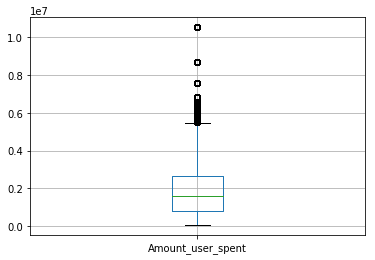

In [56]:
 df.boxplot(column=['Amount_user_spent'])  # a lot of outliers who are high spenders

In [57]:
df[df['Amount_user_spent']>2.669963e+06]['User_ID_x'].nunique()  # number of high spenders  

328

In [58]:
df[df['Amount_user_spent']>4.016045e+06]['User_ID_x'].nunique() # top 10 % of our spenders


99

In [59]:
# creating top spender column 
def topSpender(column):
    if column>2.669963e+06:
        return 1
    else:
        return 0
    
df['High_spender']=df['Amount_user_spent'].apply(topSpender)

In [60]:
# creating user category column 
def userCategory(column):
    if column < 3.799300e+05:
        return 1
    if column < 6.481080e+05:
        return 2
    if column < 9.156900e+05:
        return 3
    if column < 1.222462e+06:
        return 4
    if column < 1.564596e+06:
        return 5
    if column < 1.951554e+06:
        return 6
    if column < 2.413364e+06:
        return 7
    if column < 3.031467e+06:
        return 8
    if column < 4.016045e+06:
        return 9
    else:
        return 10
df['User_category']=df['Amount_user_spent'].apply(userCategory)    

In [61]:
df.head()

,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Purchase_price_x,User_prod_bought,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,8370,35,11870.863436,2648,13716,227,0,334093,0,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,15200,35,16304.030981,3880,19701,581,0,334093,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,...,1422,35,1237.892157,343,1776,102,0,334093,0,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,1057,35,1455.140762,365,1778,341,0,334093,0,1
4,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,...,12842,35,13836.970924,3209,16504,963,1,334093,0,1


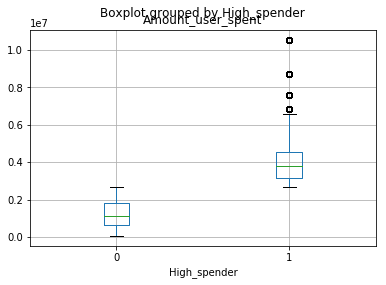

In [62]:
df.boxplot(column=['Amount_user_spent'], by='High_spender')

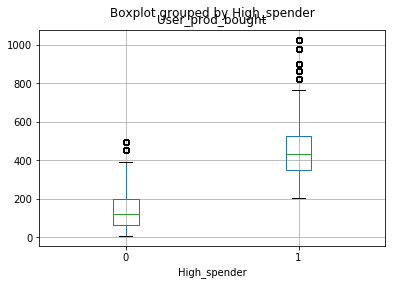

In [63]:
df.boxplot(column=['User_prod_bought'], by='High_spender')  # high spenders buy more items

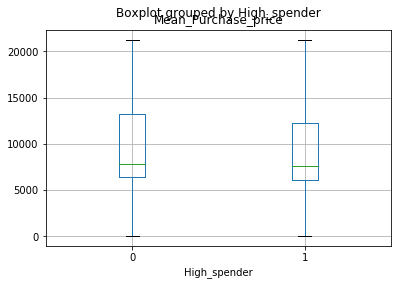

In [64]:
df.boxplot(column=['Mean_Purchase_price'], by='High_spender')  # low spenders by items that have a higher mean purchase price than high spenders


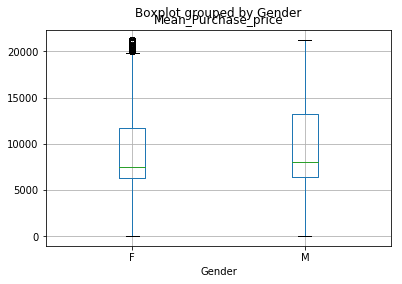

In [65]:
df.boxplot(column=['Mean_Purchase_price'], by='Gender') 

In [66]:

df['Flaghigh'] = (df.Purchase_price_x > df.Mean_Purchase_price).astype(int)

In [67]:
df.head()

,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,User_prod_bought,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Flaghigh
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,35,11870.863436,2648,13716,227,0,334093,0,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,35,16304.030981,3880,19701,581,0,334093,0,1,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,...,35,1237.892157,343,1776,102,0,334093,0,1,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,35,1455.140762,365,1778,341,0,334093,0,1,0
4,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,...,35,13836.970924,3209,16504,963,1,334093,0,1,0


In [68]:
sumHigh=df.groupby('User_ID_x')['Flaghigh'].sum()

In [69]:
sumHigh=pd.DataFrame(sumHigh).reset_index()

In [70]:
sumHigh.head()

,User_ID_x,Flaghigh
0,1000001,19
1,1000002,35
2,1000003,19
3,1000004,10
4,1000005,29


In [71]:
df=pd.merge(df,sumHigh, on ='User_ID_x')

In [72]:
df['propHigh']=df['Flaghigh_y']/df['User_prod_bought']
df=df.rename( columns={"Flaghigh_x": "Paid_more_avg","Flaghigh_y": "Num_Paid_more_avg"})

In [73]:
df.head()

,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Min_purchase_price,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,2648,13716,227,0,334093,0,1,0,19,0.542857
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,3880,19701,581,0,334093,0,1,0,19,0.542857
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,...,343,1776,102,0,334093,0,1,1,19,0.542857
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,365,1778,341,0,334093,0,1,0,19,0.542857
4,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,...,3209,16504,963,1,334093,0,1,0,19,0.542857


In [74]:
female=df.groupby(['Product_ID_x','Gender'])['Purchase_price_x'].mean()

In [75]:
female=pd.DataFrame(female)

In [76]:
female.head()

Purchase_price_x
Product_ID_x Gender                  
P00000142    F           11284.158501
             M           11083.072050
P00000242    F           10472.582418
             M           10577.161404
P00000342    F            5544.434783

In [77]:
female=female.unstack('Gender')

In [78]:
female.head()

Purchase_price_x              
Gender                      F             M
Product_ID_x                               
P00000142        11284.158501  11083.072050
P00000242        10472.582418  10577.161404
P00000342         5544.434783   5222.337143
P00000442         5134.282609   4456.434783
P00000542         5674.800000   5287.595960

In [79]:
female['Fem_Male']=female['Purchase_price_x', 'F']/female['Purchase_price_x', 'M']

In [80]:
female.head()

Purchase_price_x                Fem_Male
Gender                      F             M          
Product_ID_x                                         
P00000142        11284.158501  11083.072050  1.018144
P00000242        10472.582418  10577.161404  0.990113
P00000342         5544.434783   5222.337143  1.061677
P00000442         5134.282609   4456.434783  1.152105
P00000542         5674.800000   5287.595960  1.073229

In [81]:
df=pd.merge(df,female[['Fem_Male']], on ='Product_ID_x')

/Users/Faliha/miniconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [82]:
df.head()

,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh,"(Fem_Male, )"
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,13716,227,0,334093,0,1,0,19,0.542857,1.030861
1,1000017,P00069042,M,51-55,1,C,0,0,3,NaN,...,13716,227,0,1425995,0,5,1,85,0.739130,1.030861
2,1000023,P00069042,M,36-45,0,B,3,1,3,NaN,...,13716,227,0,1670998,0,6,0,60,0.350877,1.030861
3,1000030,P00069042,F,36-45,7,C,3,0,3,NaN,...,13716,227,0,261584,0,1,0,10,0.322581,1.030861
4,1000073,P00069042,M,18-25,4,A,4+,0,3,NaN,...,13716,227,0,1428303,0,5,0,70,0.522388,1.030861


In [83]:
#df.drop("('Fem_Male', '')_x",axis=1, inplace=True)

In [84]:
df=df.rename(columns={"('Fem_Male', '')_x": "F_prop"})

In [85]:
df=df.iloc[:,:-1]


In [86]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [87]:
df.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [88]:
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [89]:
df.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [90]:
df.Product_Category_1.isna().sum()

0

In [91]:
df.Product_Category_2.isna().sum()

173638

In [92]:
df.Product_Category_3.isna().sum()

383247

In [93]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [94]:
df.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [95]:
df.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [108]:
df.Min_purchase_price.describe()

count    550068.000000
mean       2665.858114
std        1255.325295
min          12.000000
25%        1739.000000
50%        2034.000000
75%        3810.000000
max       20323.000000
Name: Min_purchase_price, dtype: float64

In [123]:
def luxury(col):
    if col >12972:
        return 1
    else:
        return 0


df['luxury']=df['Purchase_price_x'].apply(luxury)

In [124]:
df.head()

,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh,luxury
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,13716,227,0,334093,0,1,0,19,0.542857,0
1,1000017,P00069042,M,51-55,1,C,0,0,3,NaN,...,13716,227,0,1425995,0,5,1,85,0.739130,1
2,1000023,P00069042,M,36-45,0,B,3,1,3,NaN,...,13716,227,0,1670998,0,6,0,60,0.350877,0
3,1000030,P00069042,F,36-45,7,C,3,0,3,NaN,...,13716,227,0,261584,0,1,0,10,0.322581,0
4,1000073,P00069042,M,18-25,4,A,4+,0,3,NaN,...,13716,227,0,1428303,0,5,0,70,0.522388,0


In [125]:
df.to_csv('new_df.csv')